<a href="https://colab.research.google.com/github/feteiha/ML-Course/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json
 
from matplotlib import pyplot as plt
 
import numpy as np

In [3]:
def function(x):
    return 10*x**2 - 5*x - 0.5

In [4]:
x_train = np.random.rand(10000)
y_train = function(x_train)
 
x_test = np.linspace(0, 1, 100)
y_test = function(x_test)

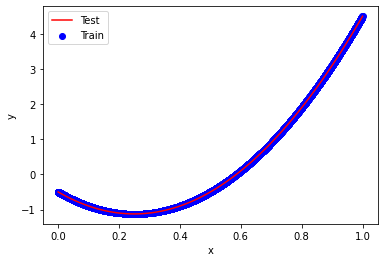

In [5]:
plt.scatter(x_train, y_train, label='Train', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [30]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units= 20, activation= 'relu'))
model.add(Dense (units= 1))
# Add a dense layer with 20 units
# Add a 'relu' activation layer
# Add an output dense layer with 1 unit

In [31]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               400       
_________________________________________________________________
activation_4 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                4020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 4,441
Trainable params: 4,441
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss= 'mse' , optimizer= 'Adam')

In [33]:
history = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.9539 - val_loss: 0.0608
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0233 - val_loss: 0.0132
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/10
200/200 [==============================] - 0s 2ms/step - loss: 7.6199e-04 - val_loss: 7.

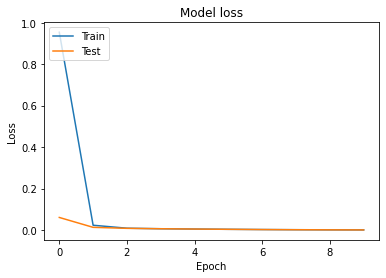

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
y_predictions = model.predict(x_test)

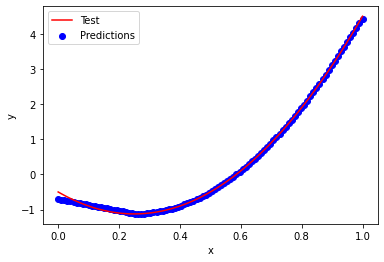

In [15]:
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [16]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [19]:
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
loaded_model.compile(loss= 'mse' , optimizer= 'Adam')

In [23]:
y_predictions = loaded_model.predict(x_test, batch_size= 1)

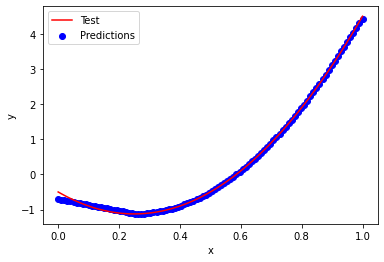

In [24]:
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()